### K Means and PCA

Dataset used: 
https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings('ignore')

### KMeans (With Python Package)

K-Means can cluster instances into different clusters. In our dataset, we actually have the true label, 'status_type'. This can help us assess how K-means perform for this problem. However, usually for K-means, we do not have the real label, and have to use other method to see how well k-means perform. For example, we can see the distribution of each feature in each cluster, and see the general profile that each cluster represents.

#### Preprocessing

In [23]:
data_path = '/content/facebook.csv'
df = pd.read_csv(data_path)
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


There are four columns consisting of null values, we drop these columns. Also, status_id and status_published are unique identifiers, which also do not add to our analysis. We drop these columns as well.

In [24]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4', 'status_id', 'status_published'], axis=1, inplace=True)

In [25]:
# check null values
print(len(df))
# check status_type values
print(df['status_type'].unique())
df.info()

7050
['video' 'photo' 'link' 'status']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


There is no missing value in other columns. There are four types of status, ['video' 'photo' 'link' 'status']. Let's build a dictionary to transform the categories to integer values.

In [26]:
type_dict = {key: value for key, value in zip(['video', 'photo', 'link', 'status'], [1,2,3,4])}
df['status_type'] = df['status_type'].map(type_dict)

Note that KMeans is also an algorithm based on distance. To prevent the model be dominated by features having a large scale of values, we standardize the data before feeding it into the algorithm. This also expedites convergence and makes the fitting process faster.

In [27]:
y = df['status_type']
X = df.drop('status_type', axis = 1)

# standardize the data
cols = X.columns
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. 

We choose different number of clusters and keep track of the corresponding inertias. A good model is one with low inertia AND a low number of clusters!

#### Running K-Means model

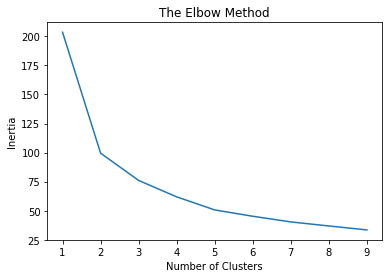

In [ ]:
inertias = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.xticks([1,2,3,4,5,6,7,8,9])
plt.ylabel('Inertia')
plt.show()

Based on the plot above, I would choose K=5. Although k = 2 seems to be a kink,the inertia keeps decreasing and slowly plateaus after k = 5.

From our dataset, we know that the true number of types are 4. But in reality, when we do clustering, it is an unsupervised method and we usually do not have the true labels. Therefore, we do not really know how many clusters there are. 

This example indicates that choosing the number of clusters based on the Elbow Method involves the analyst's subjective opinions. Some domain knowledge will greatly help as you can make a more educated guess about the number of clusters.

Also, look at the classes in our datset, ['video' 'photo' 'link' 'status'], it is hard to separate them into different clusters based on engagement metrics.

### PCA

We want to use PCA to explore if some of our variables capture similar information and can be condensed into a few number of principle components.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [28]:
type_dict_reverse = {value:key for key, value in type_dict.items()}
target_names = df['status_type'].map(type_dict_reverse)

In [29]:
# we use standard scaler here
y = df['status_type']
X = df.drop('status_type', axis = 1)
print(X.columns)
print('Number of columns in X: ', len(X.columns))
X = StandardScaler().fit_transform(X)

Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')
Number of columns in X:  9


We may expect among our variables, 'num_reactions', 'num_comments', 'num_shares' capture a common concept of 'popularity'; 

'num_likes', 'num_loves', 'num_wows''num_hahas' capture a common concept of 'positive feedback'; 

'num_sads', 'num_angrys' capture a common concept of 'negative feedback'.

#### 2D PCA

In [12]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

# output pcs
pc_df = pd.DataFrame(data = principalComponents, columns = ['PC_1', 'PC_2'])
pc_df['target'] = target_names

In [13]:
pc_df.head()

,PC_1,PC_2,target
0,2.255817,-0.122109,video
1,-0.632921,0.047366,photo
2,0.100804,-0.057427,video
3,-0.682104,-0.061251,photo
4,-0.453211,0.170515,photo


#### Visualize 2D PCA

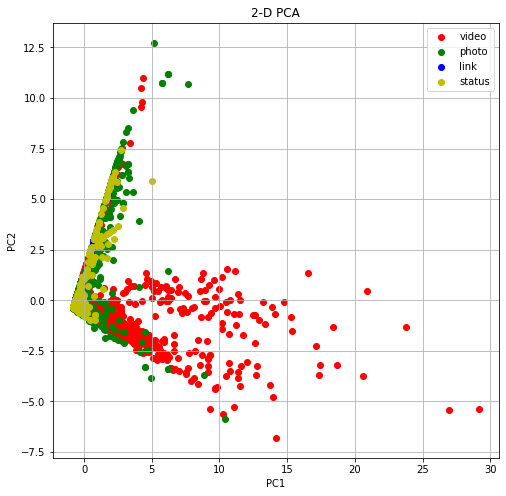

In [14]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('2-D PCA')

targets = ['video', 'photo', 'link', 'status']
colors = ['r', 'g', 'b', 'y']

for target, color in zip(targets, colors):
    idxs = (pc_df['target'] == target)
    ax.scatter(pc_df.loc[idxs, 'PC_1'], pc_df.loc[idxs, 'PC_2'], c = color)

ax.legend(targets)
ax.grid()

In [15]:
pca.explained_variance_ratio_

array([0.3832663 , 0.19289793])

Based on the explained variance, we know how much information (variance) can be attributed to each of the principal components. We see that the first two components explain about 58% of the information. This indicates that if keeping only two principle components we lose some information in the original data. When we look at the 2_D visualization, we see the 'status' and 'photo' types greatly overlap with each other. Our 2-D principal components can not separate them out.

However, since our variables are feedbacks, like the numbers of positive and negative comments, we would expect that 'status' and 'photo' are quite similar, as they are both types where people share their lives.

#### 3D PCA and Visualization

In [17]:
from mpl_toolkits.mplot3d import Axes3D

In [18]:
color_map = {target: color for target, color in zip(targets, colors)}
c_lst = pc_df['target'].map(color_map)

Text(0.5, 0.92, '3D PCA')

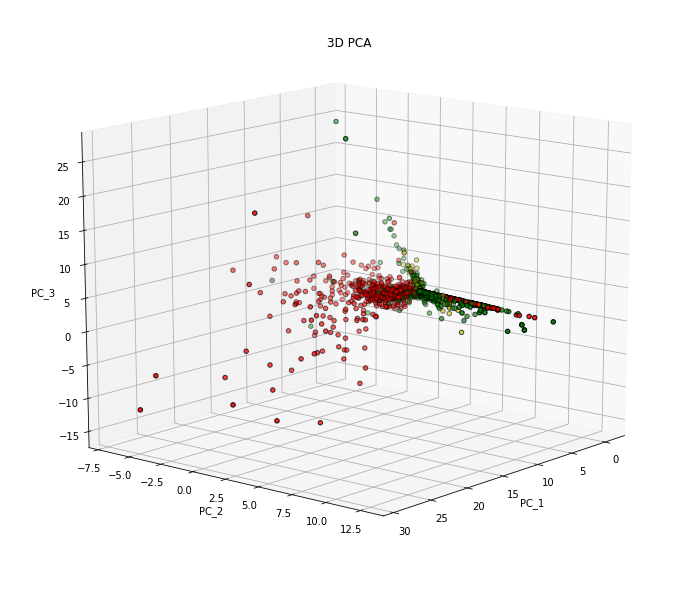

In [20]:
pca_3d = PCA(n_components=3)
principalComponents_3d = pca_3d.fit_transform(X)

# output pcs
pc_3d_df = pd.DataFrame(data = principalComponents_3d, columns = ['PC_1', 'PC_2', 'PC_3'])
pc_3d_df['target'] = target_names

fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=40)

ax.scatter(pc_3d_df['PC_1'], pc_3d_df['PC_2'], pc_3d_df['PC_3'], c= c_lst, edgecolor='k')
ax.set_xlabel('PC_1')
ax.set_ylabel('PC_2')
ax.set_zlabel('PC_3')
ax.set_title('3D PCA')

In [21]:
pca_3d.explained_variance_ratio_

array([0.3832663 , 0.19289793, 0.1072141 ])

In [22]:
sum([0.3832663, 0.19289793, 0.1072141])

0.68337833

The first 3 principal components together explain 68.3% of total variance.